In this project, I'll try to predict the total number of bikes people rented in a given hour. I'll predict the 'cnt' column using all of the other columns, except for 'casual' and 'registered'. To accomplish this, I'll create a few different machine learning models and evaluate their performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [3]:
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


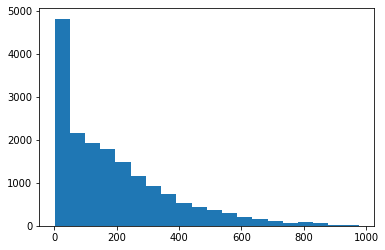

In [4]:
plt.hist(bike_rentals['cnt'],bins=20)
plt.show()

In [5]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [6]:
def assign_label(n):
    if (n >= 6) & (n < 12):
        return(1)
    if (n >= 12) & (n < 18):
        return(2)
    if (n >= 18) & (n < 24):
        return(3)
    if (n >= 0) & (n < 6):
        return(4)

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

As items in 'cnt' column is continuous, I will go with mean_squared_error as an error metric. 

In [10]:
train = bike_rentals.sample(frac=0.8,random_state=1)

In [14]:
test = bike_rentals.drop(labels = train.index,axis=0)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
cols = ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']

In [26]:
lr = LinearRegression()
lr.fit(train[cols],train['cnt'])
predictions_lr = lr.predict(test[cols])
error_lr = mean_squared_error(test['cnt'],predictions_lr)
print(error_lr)

17052.124871247568


In [27]:
np.sqrt(error_lr)

130.5837848710458

Clearly from the above analysis, it is clear that linear regression model is not much accurate, we can check different models as well to lower the error. 

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dt = DecisionTreeRegressor()
dt.fit(train[cols],train['cnt'])
predictions_dt = dt.predict(test[cols])
error_dt = mean_squared_error(test['cnt'],predictions_dt)
print(error_dt)

3158.5517836593785


In [30]:
np.sqrt(error_dt)

56.200994507743175

In [41]:
errors_dt = []
for i in range(1,21):
    dt = DecisionTreeRegressor(min_samples_leaf=i)
    dt.fit(train[cols],train['cnt'])
    predictions_dt = dt.predict(test[cols])
    error_dt = mean_squared_error(test['cnt'],predictions_dt)
    errors_dt.append(error_dt)

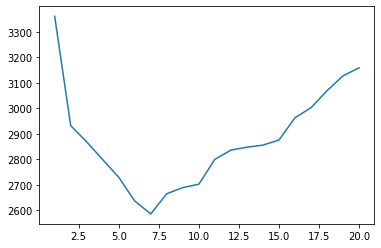

In [42]:
plt.plot(range(1,21),errors_dt)
plt.show()

Overall, the error for decision trees is less as compared to linear regression phenomenon. It is the lowest when min_sample_leaf = 7. 

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor()
rf.fit(train[cols],train['cnt'])
predictions_rf = rf.predict(test[cols])
error_rf = mean_squared_error(test['cnt'],predictions_rf)
print(error_rf)

1850.3775633486766


In [45]:
print(np.sqrt(error_rf))

43.01601519607176


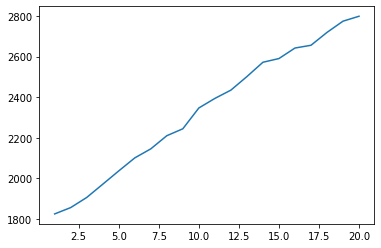

In [46]:
errors_rf = []

for i in range(1,21):
    rf = RandomForestRegressor(min_samples_leaf=i)
    rf.fit(train[cols],train['cnt'])
    predictions_rf = rf.predict(test[cols])
    error_rf = mean_squared_error(test['cnt'],predictions_rf)
    errors_rf.append(error_rf)
    
plt.plot(range(1,21),errors_rf)
plt.show()

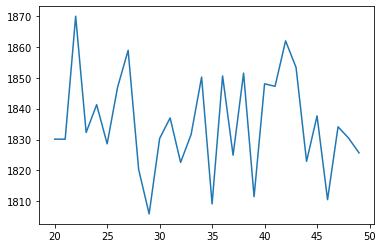

In [50]:
errors_rf = []

for i in range(20,50):
    rf = RandomForestRegressor(max_depth=i)
    rf.fit(train[cols],train['cnt'])
    predictions_rf = rf.predict(test[cols])
    error_rf = mean_squared_error(test['cnt'],predictions_rf)
    errors_rf.append(error_rf)
    
plt.plot(range(20,50),errors_rf)
plt.show()